<a href="https://colab.research.google.com/github/khushee-g/EEG/blob/main/random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier from sklearn.model selection import train _test_split # Import train _test_split function
from sklearn import metrics

In [14]:
data = pd.read_csv('/content/EEG.machinelearing_data_BRMH 2.csv')
#split dataset in features and target variable
feature_cols = ['AB.A.delta.a.FP1', 'AB.A.delta.b.FP2','AB.A.delta.c.F7','AB.A.delta.d.F3','AB.A.delta.e.Fz',	'AB.A.delta.f.F4',	'AB.A.delta.g.F8',	'AB.A.delta.h.T3',	'AB.A.delta.i.C3','main.disorder']
X = data[feature_cols] # Features
X[~X.isnull().any(axis=1)]
y = X["main.disorder"] # Target variable
del X["main.disorder"]

In [15]:
y = y.astype('str')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [17]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
#y_pred = clf.predict(X_test)
sample = np.array([[28, 32, 55]])
#print("Predicted class:", clf.predict(sample))

# Calculate accuracy for the test set (assuming `y_test` and `X_test` are defined)
y_test_pred = clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_test_pred))

Accuracy: 0.22183098591549297


In [ ]:
y_train.shape

(661,)

In [ ]:
print(X.head())

   AB.A.delta.a.FP1  AB.A.delta.b.FP2
0         35.998557         21.717375
1         13.425118         11.002916
2         29.941780         27.544684
3         21.496226         21.846832
4         37.775667         33.607679


In [18]:
!pip install graphviz
!pip install pydotplus



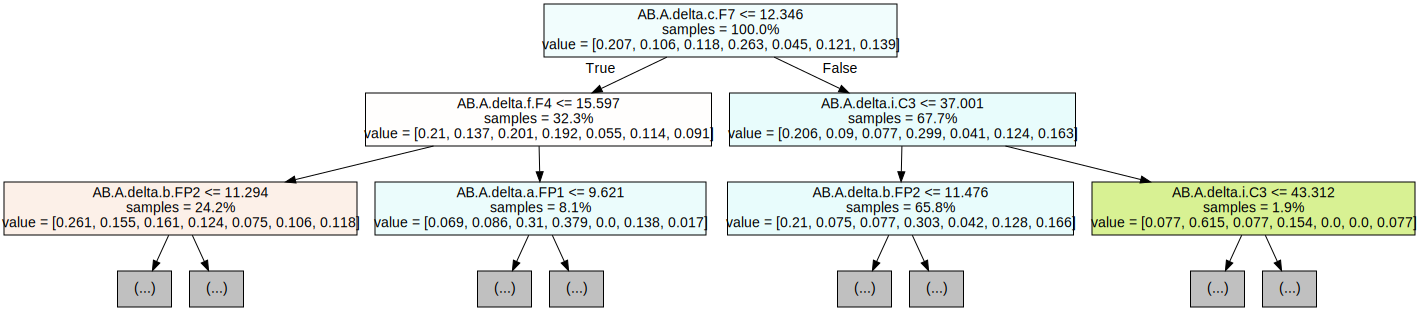

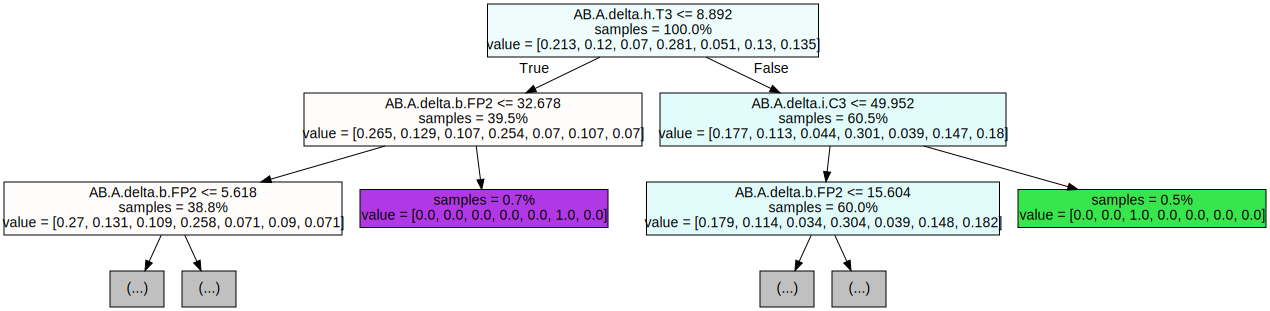

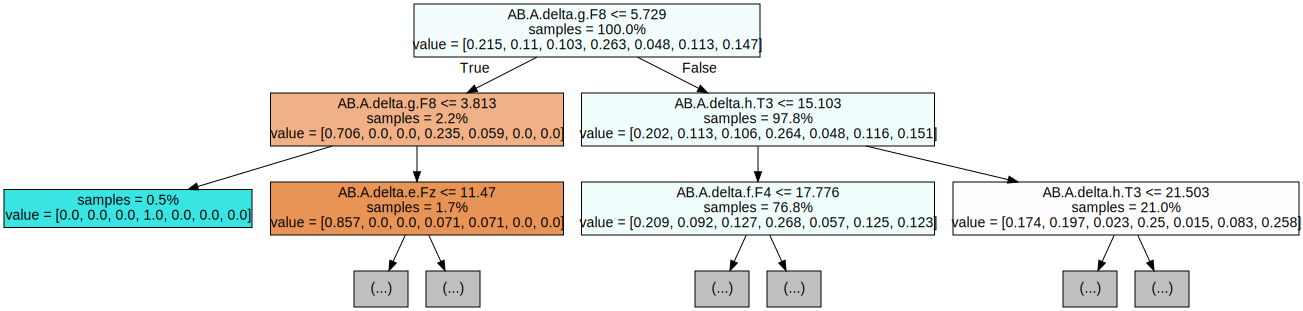

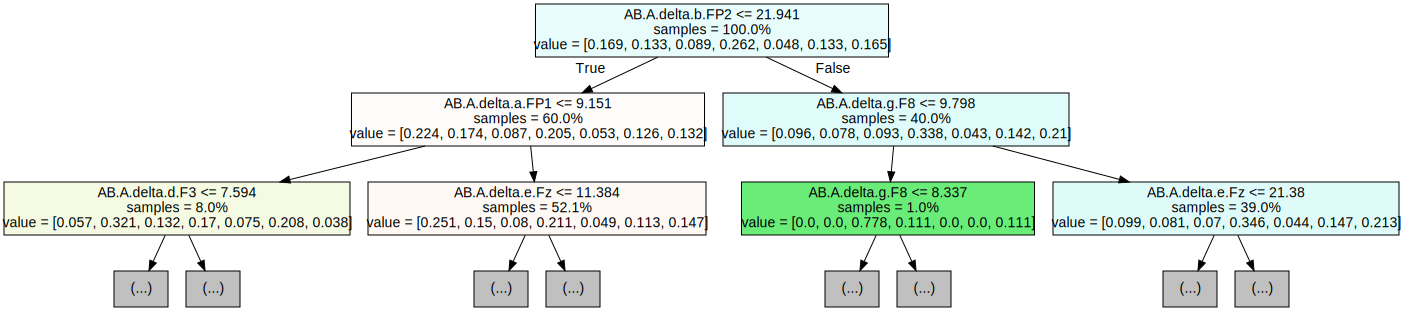

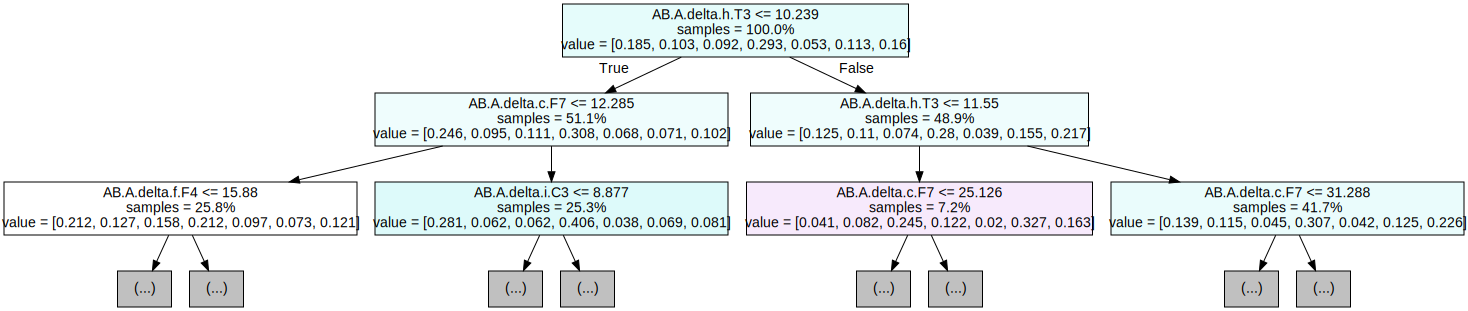

In [21]:
from sklearn.tree import export_graphviz
from io import StringIO  # Replacing six's StringIO
from IPython.display import Image
import pydotplus

rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Drop rows with missing values
X_train_clean = X_train.dropna()
y_train_clean = y_train[X_train_clean.index]

# Train the random forest on the cleaned dataset
rf.fit(X_train_clean, y_train_clean)

# Export and display the first three trees
for i in range(5):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train_clean.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)
